In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append('..')

In [2]:
import torchvision
import torch as T
import torch.nn as nn
import numpy as np

import utils as ut

In [3]:
img = ut.load_img('https://www.vettedpetcare.com/vetted-blog/wp-content/uploads/2018/08/How-To-Travel-With-a-Super-Anxious-Cat-square.jpeg')
img = img.unsqueeze(0).float() / 255

torch.Size([1, 3, 900, 900])

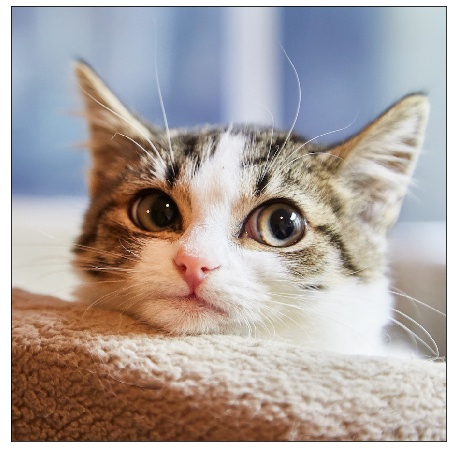

In [4]:
ut.vis.imshow(img)
img.shape

In [5]:
import kornia

In [54]:
i = img

offsets = T.randn(1, 2) * i.shape[-1] * 0.05
angles = T.randn(1) * 10
scales = T.randn(1) / 5 + 1
noise = T.randn_like(i) / 4

# i = kornia.scale(i, scales)
# i = kornia.rotate(i, angles)
# i = kornia.translate(i, offsets)
# i = kornia.augmentation.RandomPerspective(0.5, p=0.9)(i)
i = kornia.augmentation.RandomCrop([2, 2])(i)


i = i + noise

i.imshow()

RuntimeError: The size of tensor a (2) must match the size of tensor b (900) at non-singleton dimension 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


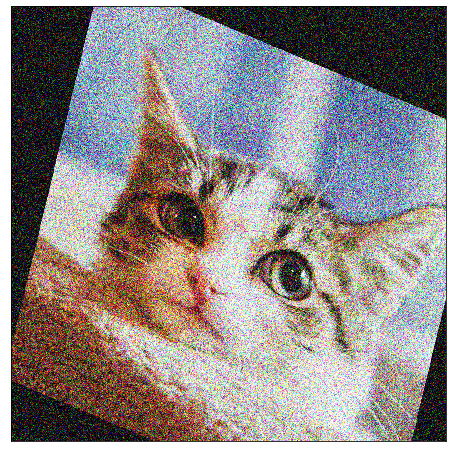

In [78]:
(nn.Sequential(
    kornia.augmentation.RandomAffine(
        degrees=30,
        translate=[0.1, 0.1],
        scale=[0.9, 1.1],
        shear=[-10, 10],
    ),
    kornia.augmentation.RandomPerspective(0.5, p=0.5),
)(img) + noise).imshow()

In [25]:
img.shape, angles

(torch.Size([1, 3, 900, 900]), tensor([-0.9011]))

In [90]:
torchvision.utils.make_grid(T.rand(10, 3, 28, 28), padding=2).shape

torch.Size([3, 62, 242])